In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

In [2]:
FONT_SIZE_1 = 20
FONT_SIZE_2 = 18
FONT_SIZE_3 = 16

COLOR = "#132a70"
ALPHA = 0.2
LINE_WIDTH = 1.0

In [3]:
def hyperbolic(theta, lamda, t):
    return theta/(1 + lamda*t)

def exponential(theta, lamda, t):
    return theta*np.exp(-lamda*t)

### NDT-informed Thresholds

In [ ]:
# NDT-informed parameters
hyp_speed = pd.read_csv('_prms/hyp.csv')[['b0_sp', 'lambda_sp']].rename(columns={'b0_sp': 'b0', 'lambda_sp': 'lambda'})
hyp_accuracy = pd.read_csv('_prms/hyp.csv')[['b0_ac', 'lambda_ac']].rename(columns={'b0_ac': 'b0', 'lambda_ac': 'lambda'})
exp_speed = pd.read_csv('_prms/exp.csv')[['b0_sp', 'lambda_sp']].rename(columns={'b0_sp': 'b0', 'lambda_sp': 'lambda'})
exp_accuracy = pd.read_csv('_prms/exp.csv')[['b0_ac', 'lambda_ac']].rename(columns={'b0_ac': 'b0', 'lambda_ac': 'lambda'})

thresholds = [hyp_speed, hyp_accuracy, exp_speed, exp_accuracy]

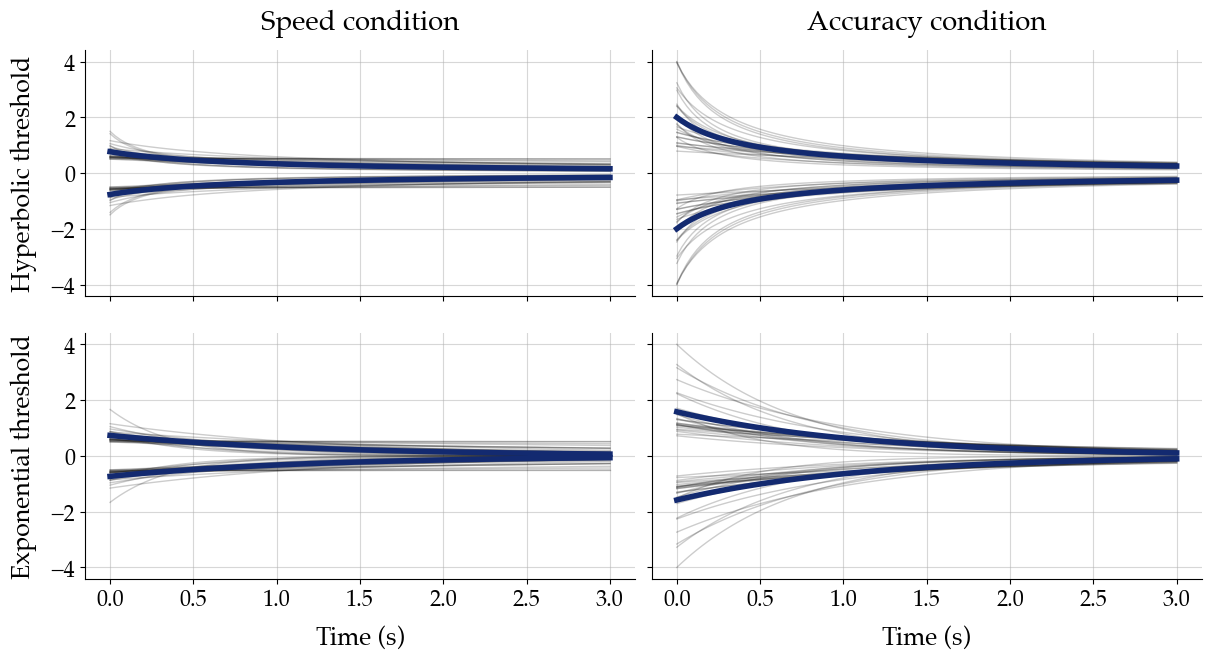

In [7]:
time = np.linspace(0, 3, 100)
fig, axs = plt.subplots(2, 2, figsize=(12, 6.5), layout='constrained', sharey=True, sharex=True)
for i, ax in enumerate(axs.flat):
    for j in range(hyp_speed.shape[0]):
        if i < 2:
            ax.plot(
                time, hyperbolic(thresholds[i]['b0'][j], thresholds[i]['lambda'][j], time),
                c='black', alpha=ALPHA, linewidth=LINE_WIDTH
            )
            ax.plot(
                time, hyperbolic(-thresholds[i]['b0'][j], thresholds[i]['lambda'][j], time),
                c='black', alpha=ALPHA, linewidth=LINE_WIDTH
            )
        else:
            ax.plot(
                time, exponential(thresholds[i]['b0'][j], thresholds[i]['lambda'][j], time),
                c='black', alpha=ALPHA, linewidth=LINE_WIDTH
            )
            ax.plot(
                time, exponential(-thresholds[i]['b0'][j], thresholds[i]['lambda'][j], time),
                c='black', alpha=ALPHA, linewidth=LINE_WIDTH
            )
            ax.set_xlabel('Time (s)', fontsize=FONT_SIZE_2, labelpad=10)
    
    if i < 2:
        ax.plot(
            time, hyperbolic(thresholds[i]['b0'].mean(), thresholds[i]['lambda'].mean(), time),
            c=COLOR, alpha=1, linewidth=LINE_WIDTH + 3
        )
        ax.plot(
            time, hyperbolic(-thresholds[i]['b0'].mean(), thresholds[i]['lambda'].mean(), time),
            c=COLOR, alpha=1, linewidth=LINE_WIDTH + 3
        )
    else:
        ax.plot(
            time, exponential(thresholds[i]['b0'].mean(), thresholds[i]['lambda'].mean(), time),
            c=COLOR, alpha=1, linewidth=LINE_WIDTH + 3
        )
        ax.plot(
            time, exponential(-thresholds[i]['b0'].mean(), thresholds[i]['lambda'].mean(), time),
            c=COLOR, alpha=1, linewidth=LINE_WIDTH + 3
        )
    if i == 0:
        ax.set_ylabel('Hyperbolic threshold', fontsize=FONT_SIZE_2, labelpad=10)
        ax.set_title("Speed condition", fontsize=FONT_SIZE_1, pad=15)
    if i == 1:
        ax.set_title("Accuracy condition", fontsize=FONT_SIZE_1, pad=15)
    if i == 2:
        ax.set_ylabel('Exponential threshold', fontsize=FONT_SIZE_2, labelpad=10)
    ax.tick_params(labelsize=FONT_SIZE_3)
    ax.grid(alpha=0.5)
sns.despine()
fig.set_constrained_layout_pads(hspace=0.1, wspace=0.02)

fig.savefig(
    '_plots/thresholds_ndt_informed_s2.pdf',
    transparent=True,
    dpi=600,
    bbox_inches='tight'
)

### Uninformed Thresholds

In [ ]:
hyp_speed = pd.read_csv('_prms/bhyp.csv')[['b0_sp', 'lambda_sp']].rename(columns={'b0_sp': 'b0', 'lambda_sp': 'lambda'})
hyp_accuracy = pd.read_csv('_prms/bhyp.csv')[['b0_ac', 'lambda_ac']].rename(columns={'b0_ac': 'b0', 'lambda_ac': 'lambda'})
exp_speed = pd.read_csv('_prms/bexp.csv')[['b0_sp', 'lambda_sp']].rename(columns={'b0_sp': 'b0', 'lambda_sp': 'lambda'})
exp_accuracy = pd.read_csv('_prms/bexp.csv')[['b0_ac', 'lambda_ac']].rename(columns={'b0_ac': 'b0', 'lambda_ac': 'lambda'})

thresholds = [hyp_speed, hyp_accuracy, exp_speed, exp_accuracy]

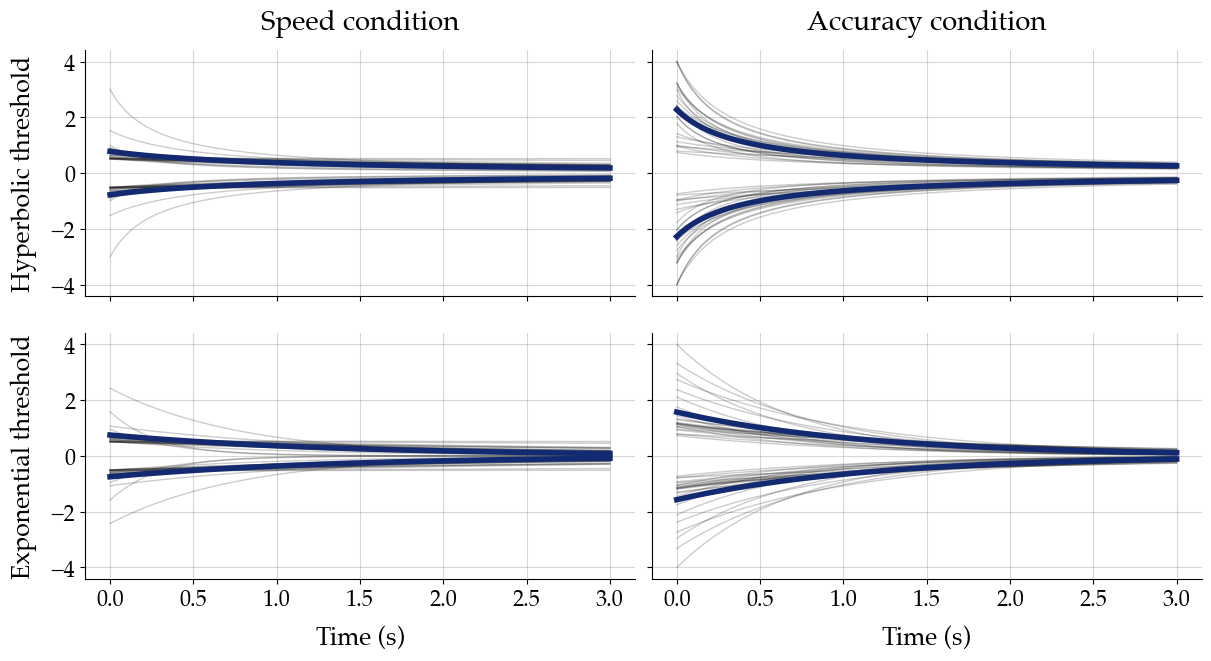

In [10]:
time = np.linspace(0, 3, 100)
fig, axs = plt.subplots(2, 2, figsize=(12, 6.5), layout='constrained', sharey=True, sharex=True)
for i, ax in enumerate(axs.flat):
    for j in range(hyp_speed.shape[0]):
        if i < 2:
            ax.plot(
                time, hyperbolic(thresholds[i]['b0'][j], thresholds[i]['lambda'][j], time),
                c='black', alpha=ALPHA, linewidth=LINE_WIDTH
            )
            ax.plot(
                time, hyperbolic(-thresholds[i]['b0'][j], thresholds[i]['lambda'][j], time),
                c='black', alpha=ALPHA, linewidth=LINE_WIDTH
            )
        else:
            ax.plot(
                time, exponential(thresholds[i]['b0'][j], thresholds[i]['lambda'][j], time),
                c='black', alpha=ALPHA, linewidth=LINE_WIDTH
            )
            ax.plot(
                time, exponential(-thresholds[i]['b0'][j], thresholds[i]['lambda'][j], time),
                c='black', alpha=ALPHA, linewidth=LINE_WIDTH
            )
            ax.set_xlabel('Time (s)', fontsize=FONT_SIZE_2, labelpad=10)
    
    if i < 2:
        ax.plot(
            time, hyperbolic(thresholds[i]['b0'].mean(), thresholds[i]['lambda'].mean(), time),
            c=COLOR, alpha=1, linewidth=LINE_WIDTH + 3
        )
        ax.plot(
            time, hyperbolic(-thresholds[i]['b0'].mean(), thresholds[i]['lambda'].mean(), time),
            c=COLOR, alpha=1, linewidth=LINE_WIDTH + 3
        )
    else:
        ax.plot(
            time, exponential(thresholds[i]['b0'].mean(), thresholds[i]['lambda'].mean(), time),
            c=COLOR, alpha=1, linewidth=LINE_WIDTH + 3
        )
        ax.plot(
            time, exponential(-thresholds[i]['b0'].mean(), thresholds[i]['lambda'].mean(), time),
            c=COLOR, alpha=1, linewidth=LINE_WIDTH + 3
        )
    if i == 0:
        ax.set_ylabel('Hyperbolic threshold', fontsize=FONT_SIZE_2, labelpad=10)
        ax.set_title("Speed condition", fontsize=FONT_SIZE_1, pad=15)
    if i == 1:
        ax.set_title("Accuracy condition", fontsize=FONT_SIZE_1, pad=15)
    if i == 2:
        ax.set_ylabel('Exponential threshold', fontsize=FONT_SIZE_2, labelpad=10)
    ax.tick_params(labelsize=FONT_SIZE_3)
    ax.grid(alpha=0.5)
sns.despine()
fig.set_constrained_layout_pads(hspace=0.1, wspace=0.02)

fig.savefig(
    '_plots/thresholds_uninformed_s2.pdf',
    transparent=True,
    dpi=600,
    bbox_inches='tight'
)